In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the text file into a NumPy array, skipping the header
# Replace 'example.txt' with your actual file name
data = np.loadtxt('act_debug.txt', delimiter=',', skiprows=1)

# Print the resulting NumPy array
print(data)

# Print the shape of the array to verify the dimensions
print("Array shape:", data.shape)


[[ 1.71926040e+09  1.71926040e+09  5.00886840e+01 ... -4.01488870e+01
   5.03083470e+01  1.31621500e+01]
 [ 1.71926040e+09  1.71926040e+09  5.00888110e+01 ... -3.77660130e+01
   4.91119570e+01  2.07437700e+01]
 [ 1.71926040e+09  1.71926040e+09  5.00889040e+01 ... -3.01815730e+01
   5.64625060e+01  1.30230700e+01]
 ...
 [ 1.71926054e+09  1.71926054e+09  5.01109820e+01 ... -6.43940200e+00
   5.12795630e+01 -5.34976000e+00]
 [ 1.71926054e+09  1.71926054e+09  5.01109700e+01 ... -3.28761700e+00
   5.12495720e+01 -7.89635000e+00]
 [ 1.71926054e+09  1.71926054e+09  5.01109660e+01 ... -9.24728700e+00
   5.10393110e+01 -3.02587000e+00]]
Array shape: (268, 28)


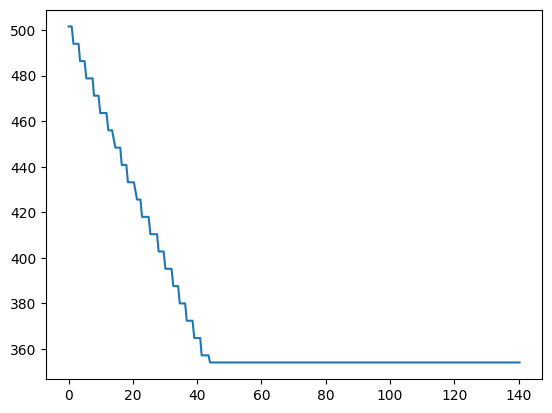

In [ ]:
plt.plot(data[:,0]-data[:,0][0],data[:,4]*0.304)

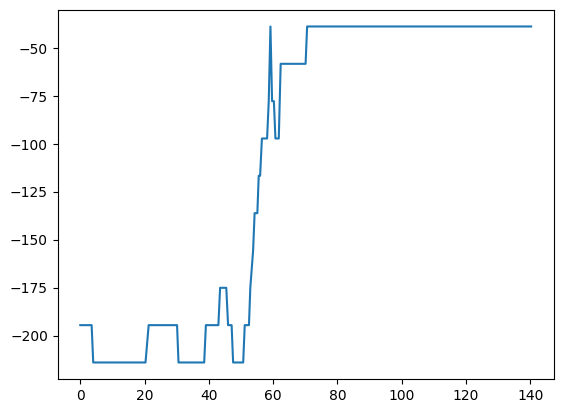

In [ ]:
plt.plot(data[:,0]-data[:,0][0],data[:,8]*0.304)

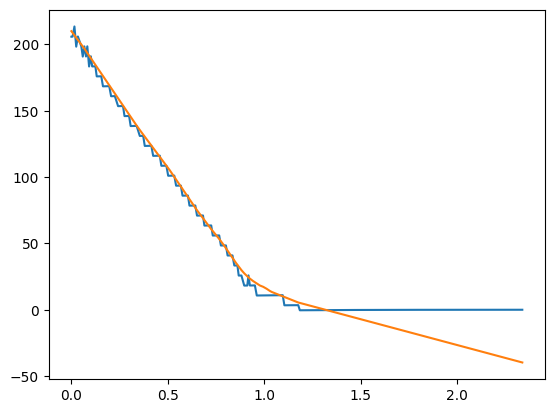

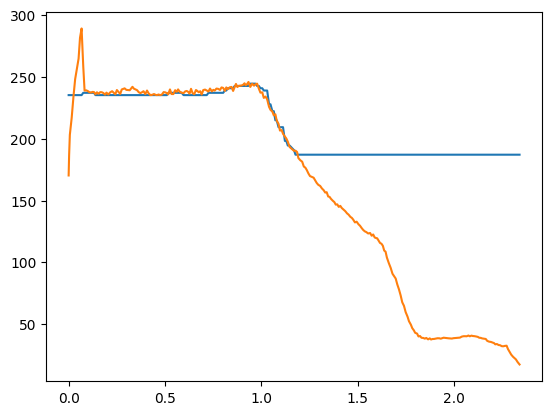

0.0


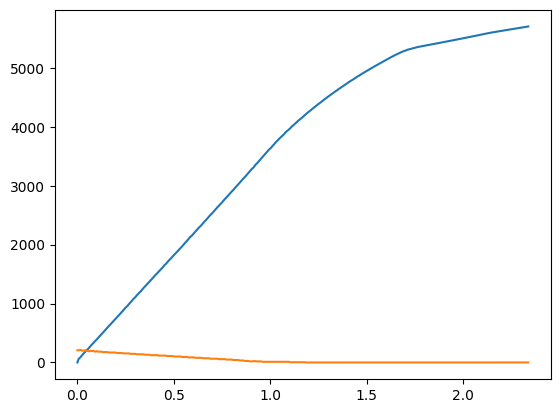

In [ ]:
t = (data[:,0]-data[:,0][0]) / 60 # cas [min]
ground_speed = data[:,6]*1.852 # horizontalna rychlost [km/h], merana zo senzorov lietadla
vertical_speed = data[:,8]*0.304 # vertikalna rychlost [m/min], merana zo senzorov lietadla

x = data[:,15] - data[:,15][0] # x-ova suradnica poloha [m]
y = data[:,16] - data[:,16][0] # y-ova suradnica poloha [m]
z = data[:,17]- data[:,17][-1] # vyska nad povrchom [m]
v_x = np.convolve(data[:,18] * 3.6,mode='same',v=np.ones(15)/15) # rychlost v smere x [km/h], dopocitana z GPS polohy
v_y = np.convolve(data[:,19] * 3.6,mode='same',v=np.ones(15)/15) # rychlost v smere y [km/h], dopocitana z GPS polohy
v_xy = np.sqrt(v_x**2 + v_y**2) # velkost rychlosti [km/h]


alt_int = np.array([np.trapz(vertical_speed[0:i+1],x=t[0:i+1]) for i in range(len(t))]) + 210
#plt.plot(t,altitude1)
#plt.plot(t,altitude2)
plt.plot(t,z)
plt.plot(t,alt_int)
plt.show()
plt.plot(t,ground_speed)
plt.plot(t,v_xy_gps)
plt.show()
plt.plot(t,x)
plt.plot(t,z)
print(z[-1])

235.204

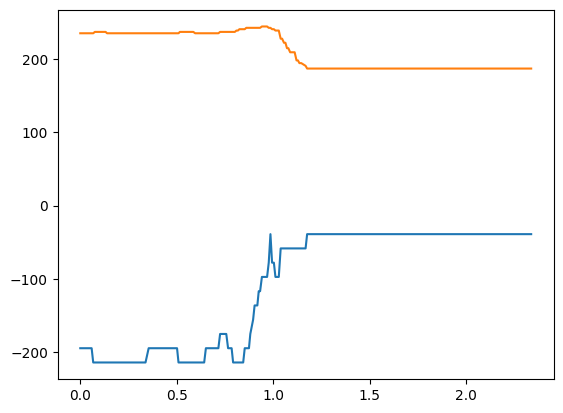

In [ ]:
plt.plot(t,vertical_speed)
vertical_speed[-1]
plt.plot(t,ground_speed)
ground_speed[0]

In [ ]:
import plotly.graph_objects as go

# Create a 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='lines+markers', marker=dict(size=5))])

# Update layout for better visualization
fig.update_layout(scene=dict(
                    xaxis_title='X Axis',
                    yaxis_title='Y Axis',
                    zaxis_title='Z Axis'),
                  title='3D Trajectory Plot')

# Show the plot
fig.show()


In [ ]:
import plotly.graph_objects as go
import numpy as np


# Create the main 3D trajectory plot
trace = go.Scatter3d(x=x, y=y, z=z,
                     mode='lines+markers',
                     marker=dict(size=5, color=t, colorscale='rdbu', colorbar=dict(title='Time [min]')),
)


# Combine the traces
fig = go.Figure(data=[trace])

# Update layout for better visualization
fig.update_layout(scene=dict(
                    xaxis_title='x [m]',
                    yaxis_title='y [m]',
                    zaxis_title='z [m]'),
                  title='Landing plane trajectory',
                  width=900,  # Width of the figure
                  height=700)  # Height of the figure

# Show the plot
fig.show()
